## IRIS Dataset
picture and text published from http://suruchifialoke.com/2016-10-13-machine-learning-tutorial-iris-classification/
![title](iris.png)

Three Iris varieties were used in the Iris flower data set outlined by Ronald Fisher in his famous 1936 paper “The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis” PDF. Since then his paper has been cited over 2000 times and the data set has been used by almost every data science beginner.

The data set consists of:

150 samples
3 labels: species of Iris (Iris setosa, Iris virginica and Iris versicolor)

4 features: length and the width of the sepals and petals, in centimetres

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
random_state = 42

### Load Dataset


sklearn libraray comes with IRIS data pre-loaded, which we would convert into a pandas dataframe


In [2]:
def get_iris_dataset():
    iris = datasets.load_iris()
    iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
    iris_df['target'] = iris.target
    print('shape', iris_df.shape)
    iris_df.head( )
    return iris_df, iris.target_names



 Read data an print first five rows

In [3]:
iris_df, target_names = get_iris_dataset()
iris_df.head()

shape (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Print data info

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


The target field in data represents the  species of flower which are mapped as mapped as
<br>setosa : 0, 
<br>versicolor: 1 
<br>virginica: 2. 



In [5]:
# print Target Names
print(target_names)


['setosa' 'versicolor' 'virginica']


We can see  that there are 50  samples of each species

In [6]:
iris_df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

### Prepare Data
We will only sepal length as feature and check if we can predict the flower species based on sepal length only .
We will only predict two classes of flowers 

setosa : 0
<br>versicolor: 1 

In [7]:
# select the rows with 0 and 1 target values
data = iris_df[iris_df.target.isin([0,1]) ]
feature = 'sepal length (cm)'

#y is the target value and X is feature column
y   = data['target']
X   = data[feature]



### Split Data into  training and test set
Split the data into training set and test set such that number of samples in training and test set are in 80:20 ratio. The model will be trained on training set and then evalauted on test set. We use stratified sampling so that the ratio of each class of flower is same in training and test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, stratify = y )

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)


print('Train Shape', X_train.shape, 'Test Shape', X_test.shape )
y_train.value_counts()


Train Shape (80, 1) Test Shape (20, 1)


1    40
0    40
Name: target, dtype: int64

### Plot Training Data
Plot the sepal length and corresponding class of flower

In [9]:
def display_classes(X_train, y_train):
    train_df = pd.DataFrame()
    train_df[feature] = X_train.ravel()   
    train_df['target'] = y_train.values
    plt.figure(figsize = (10, 6))
    ax = sns.scatterplot(x= feature, y= 'target', hue="target", 
                         style ='target', palette="Set2", data= train_df)
    plt.show()



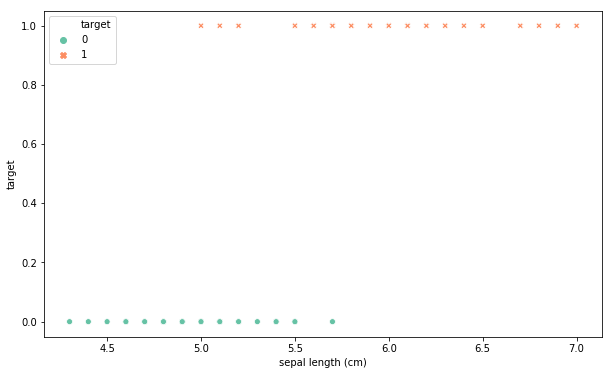

In [10]:
display_classes(X_train, y_train)

### Train the Model 
Train the Logistic Regression model using traning set data.

The model documentaion can be accessed using link 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state= random_state, C = 100, solver = 'liblinear',  max_iter = 1000 )
model.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Predict on Training set
The prediction are probabilities for positive class

In [12]:
y_prob = model.predict_proba(X_train)[:,-1]
y_prob[:5]


array([0.81070117, 0.99928612, 0.12756741, 0.72554059, 0.97950503])

### Plot the featue vs probabilties for Training Data
The blue line is probability threshold for classifying target as 0 or 1
The data above blue line are predicted as class 1 and below the line are predicted as class 0. We can see that there are some points above blue lines(in green) which are predicted as 1 but actually belong to class 0 (False Negatives)

In [13]:
def display_prob(X, y, y_prob):
    train_df = pd.DataFrame()
    train_df[feature] = X.ravel()
    train_df['pred'] = y_prob   
    train_df['Actual Classes'] = y.values
    plt.figure(figsize=(10,6))
    ax = sns.scatterplot(x= train_df[feature], y =  y_prob, hue="Actual Classes", 
                          palette="Set2", data= train_df  )
    plt.axhline(y = 0.5, color = 'b')
    
    plt.show()
    


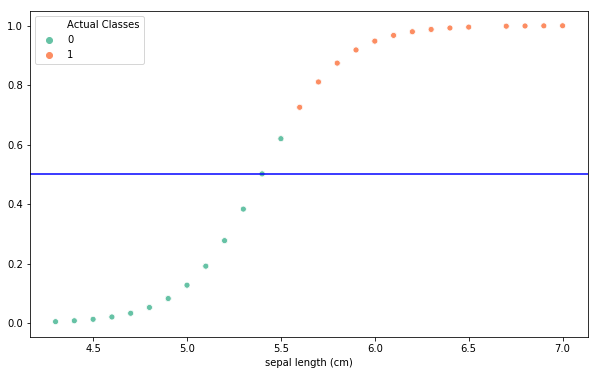

In [14]:
display_prob(X_train, y_train, y_prob )

### Plot the featue vs probabilties for Test data
Similarly for test data there are points in both classes 0 and 1 which are incorrectly predicted. Can you find those points?


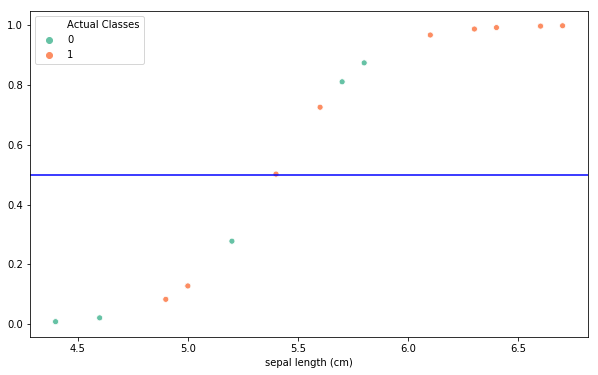

In [15]:
y_prob = model.predict_proba(X_test)[:,-1]
display_prob(X_test, y_test, y_prob )

### Predict Classes
The predict_proba in previous section method ouputs probabilities. Lets predict classes instead of probalities and check.
accuracy scores.
Even though our training accuracy is 0.8 the test accuarcy is low.  We can set petal length as feature which would have given accuracy of 1 on both training and test set

From the confusion  matrix for Test set
<br>Number of correct Predictions = TN + TP = 6 + 8 = 14
<br>False Positives = 4
<br>False Negatives = 2 
<br>Accuracy = TN + TP /(TP + TN + FP + FN) = 14/20 = 0.7

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_train)
print('Training Accuracy', accuracy_score(y_train, y_pred))
y_pred = model.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Test set confusion matrix\n', confusion_matrix(y_test, y_pred))

Training Accuracy 0.8875
Test Accuracy 0.7
Test set confusion matrix
 [[6 4]
 [2 8]]
